In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Import dataset
track_df = pd.read_csv('tracks_features.csv', header=0)
# track_df.describe()

In [40]:
# clean df
# compute duration in seconds
track_df['duration_s'] = track_df['duration_ms'] / 1000

# compute 0/1 mask for explicit
track_df['explicit_bool'] = track_df.apply(lambda row: 1 if row['explicit'] else 0, axis=1)

# remove tempo values of 0
track_df['tempo'] = track_df['tempo'].replace(0, np.nan)
# track_df['tempo'] = track_df.apply(lambda row: row['tempo'] if row['tempo'] > 0 else None, axis=1)
track_df['tempo'].min()

30.018

In [41]:
def make_hist(X: np.array, x_label, y_label, title, bins=None, range=None, color='orange', label=None, fig=None, ax=None):
    if not fig or not ax:
        fig, ax = plt.subplots()
    if range:
        X = X[(X >= range[0]) & (X <= range[1])]
    ax.hist(X, bins=bins, range=range, color=color, histtype='bar', align='mid', rwidth=0.85, density=True, label=label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    return fig, ax

def print_descriptives(X: pd.Series, name, acc=3):
    # comb out NA values
    X = X[~(pd.isna(X))]
    print(f'{name} has:\nmean: {np.mean(X):.3f}')
    print(f'median: {np.median(X):.3f}')
    print(f'standard deviation: {np.std(X):.3f}')
    print(f'number of values: {len(np.unique(X))}')
    print(f'count: {X.count()}')
    print(f'interval: ({np.min(X):.3f}, {np.max(X):.3f})')


In [42]:
print(track_df.columns)
col_names = ['explicit_bool', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_s']
print(col_names)

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'duration_s',
       'explicit_bool'],
      dtype='object')
['explicit_bool', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_s']


Explicit_bool has:
mean: 0.069
median: 0.000
standard deviation: 0.253
number of values: 2
count: 1204025
interval: (0.000, 1.000)
----------------------
Danceability has:
mean: 0.493
median: 0.501
standard deviation: 0.190
number of values: 1362
count: 1204025
interval: (0.000, 1.000)
----------------------
Energy has:
mean: 0.510
median: 0.524
standard deviation: 0.295
number of values: 3441
count: 1204025
interval: (0.000, 1.000)
----------------------
Key has:
mean: 5.194
median: 5.000
standard deviation: 3.537
number of values: 12
count: 1204025
interval: (0.000, 11.000)
----------------------
Loudness has:
mean: -11.809
median: -9.791
standard deviation: 6.982
number of values: 39805
count: 1204025
interval: (-60.000, 7.234)
----------------------
Mode has:
mean: 0.671
median: 1.000
standard deviation: 0.470
number of values: 2
count: 1204025
interval: (0.000, 1.000)
----------------------
Speechiness has:
mean: 0.084
median: 0.045
standard deviation: 0.116
number of values: 1653

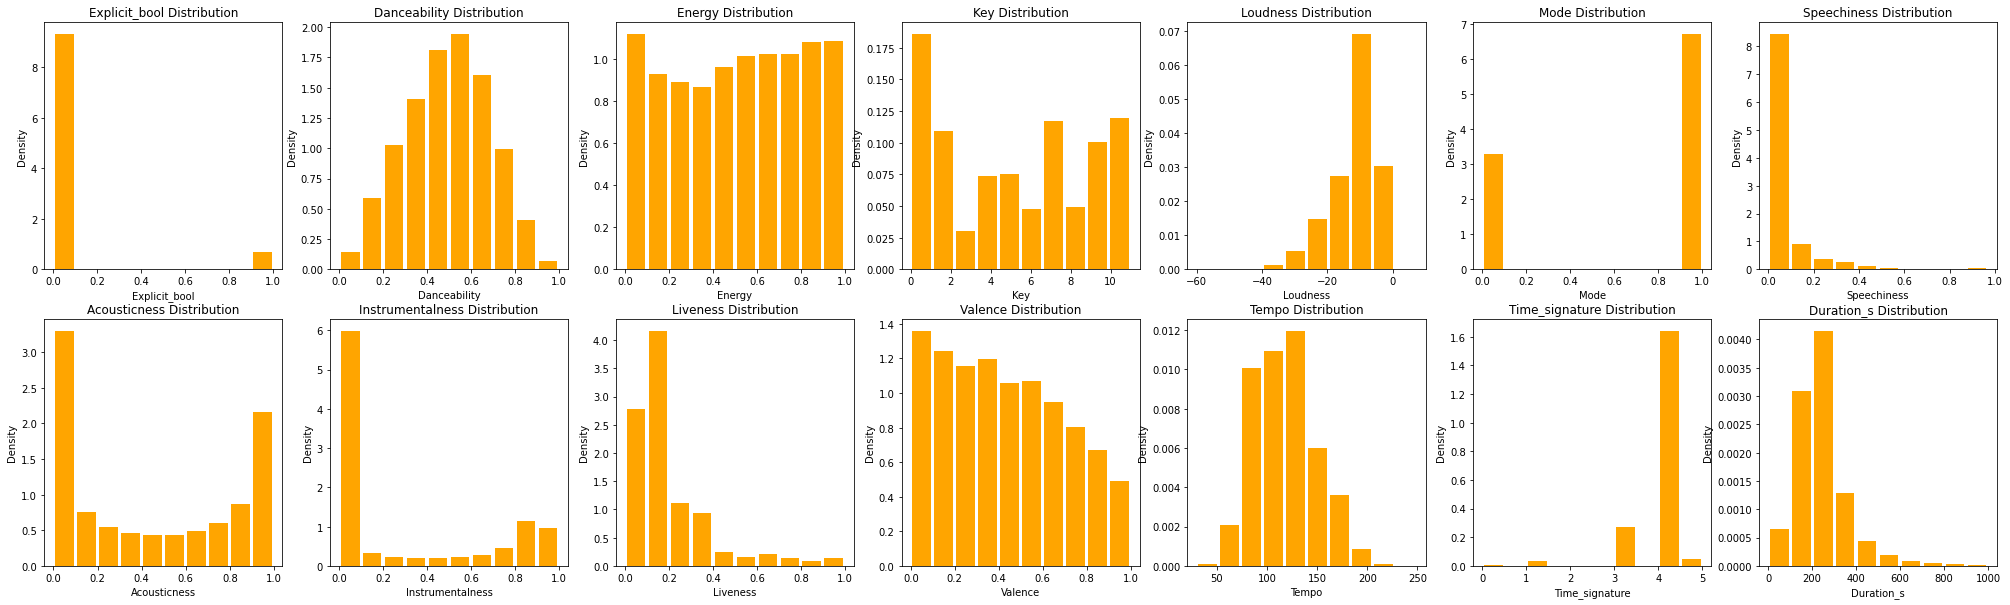

In [43]:
## Analyze all numerics
fig, axs = plt.subplots(2, 7)
i = 0
for axs_list in axs:
    for ax in axs_list:
        # Get current column name and generate descriptive name
        curr_col = col_names[i]
        desc_name = curr_col.capitalize()

        # generate hist
        try:
            if curr_col == 'duration_s':
                make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax, range=(0, 1000))
            else:
                make_hist(track_df[curr_col], desc_name, 'Density', desc_name + ' Distribution', fig=fig, ax=ax)
        except:
            print(f'Could not generate histogram for {desc_name}')
        # print descriptives
        try:
            print_descriptives(track_df[curr_col], desc_name)
        except:
            print(f'Could not print descriptives for {desc_name}')
        print('----------------------')
        i += 1
fig.set_size_inches(35, 10)
fig.show()